# nyc-east-river-bicycle dataset with linear regression and logistic regression

In [57]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 

In [2]:
dataset = pd.read_csv('nyc-east-river-bicycle-counts.csv')

In [4]:
dataset.isna().any()

Unnamed: 0             False
Date                   False
Day                    False
High Temp (°F)         False
Low Temp (°F)          False
Precipitation          False
Brooklyn Bridge        False
Manhattan Bridge       False
Williamsburg Bridge    False
Queensboro Bridge      False
Total                  False
dtype: bool

In [6]:
dataset.nunique()

Unnamed: 0             210
Date                    30
Day                     30
High Temp (°F)          21
Low Temp (°F)           21
Precipitation           10
Brooklyn Bridge         30
Manhattan Bridge        30
Williamsburg Bridge     30
Queensboro Bridge       30
Total                   30
dtype: int64

In [7]:
dataset.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [8]:
dataset = dataset.drop(["Unnamed: 0", "Day"], axis =1)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 210 non-null    object 
 1   High Temp (°F)       210 non-null    float64
 2   Low Temp (°F)        210 non-null    float64
 3   Precipitation        210 non-null    object 
 4   Brooklyn Bridge      210 non-null    float64
 5   Manhattan Bridge     210 non-null    int64  
 6   Williamsburg Bridge  210 non-null    float64
 7   Queensboro Bridge    210 non-null    float64
 8   Total                210 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 14.9+ KB


In [10]:
dataset["Date"] = dataset["Date"].apply(lambda datum: pd.to_datetime(datum))

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 210 non-null    datetime64[ns]
 1   High Temp (°F)       210 non-null    float64       
 2   Low Temp (°F)        210 non-null    float64       
 3   Precipitation        210 non-null    object        
 4   Brooklyn Bridge      210 non-null    float64       
 5   Manhattan Bridge     210 non-null    int64         
 6   Williamsburg Bridge  210 non-null    float64       
 7   Queensboro Bridge    210 non-null    float64       
 8   Total                210 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 14.9+ KB


In [13]:
#  remove non 
dataset_no_duplicates = dataset.drop_duplicates().copy()

In [14]:
dataset_no_duplicates.head()

,Date,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,2016-04-02,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2016-04-03,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,2016-04-04,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,2016-04-05,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [15]:
precipitation_new = dataset_no_duplicates.Precipitation.replace("0.47 (S)", "0.47")
precipitation_new = precipitation_new.replace("T", "0").apply(lambda cislo: float(cislo))

In [18]:
dataset_no_duplicates.Precipitation = precipitation_new

In [20]:
dataset_no_duplicates.head()

,Date,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,2016-04-02,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2016-04-03,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,2016-04-04,44.1,33.1,0.47,521.0,1067,1440.0,1307.0,4335
4,2016-04-05,42.1,26.1,0.00,1416.0,2617,3081.0,2357.0,9471


In [21]:
dataset_no_duplicates["day_of_week"] = dataset_no_duplicates.Date.apply(lambda datum: datum.isoweekday())

<AxesSubplot:title={'center':'totals by day of a week'}, xlabel='day_of_week'>

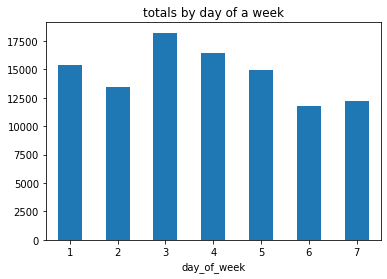

In [23]:
days_total = dataset_no_duplicates.groupby("day_of_week")["Total"].mean()
days_total.plot(kind="bar", title = "totals by day of a week", rot = 0)

In [24]:
display(days_total)

day_of_week
1    15396.75
2    13465.25
3    18211.50
4    16417.25
5    14920.40
6    11733.00
7    12201.25
Name: Total, dtype: float64

In [25]:
dataset_no_duplicates["is_weekend"] = dataset_no_duplicates["day_of_week"].apply(lambda day: 1 if day > 5 else 0)


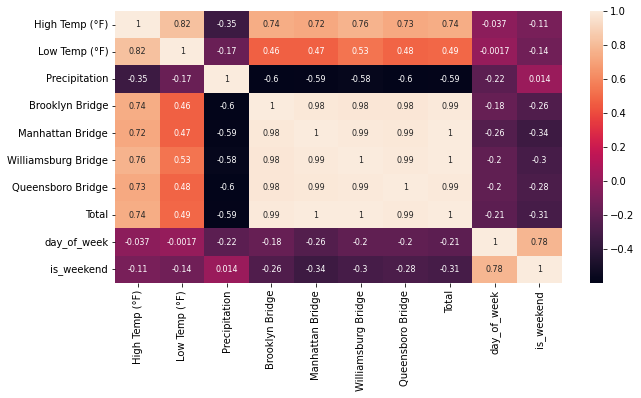

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset_no_duplicates.corr(),annot = True, annot_kws={"size": 8})
plt.show()

In [31]:
# drop feature on dataset set.......
dataset_no_duplicates = dataset_no_duplicates.drop(["Low Temp (°F)", "Brooklyn Bridge", "Manhattan Bridge", "Williamsburg Bridge", "Queensboro Bridge","day_of_week"], axis = 1)

<AxesSubplot:xlabel='Precipitation', ylabel='Total'>

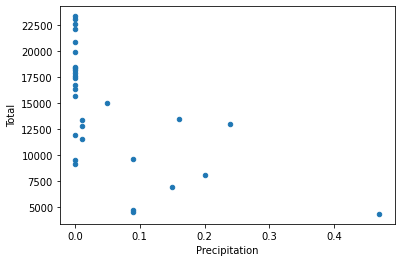

In [32]:
dataset_no_duplicates.plot(x="Precipitation", y="Total", kind="scatter")

<AxesSubplot:xlabel='High Temp (°F)', ylabel='Total'>

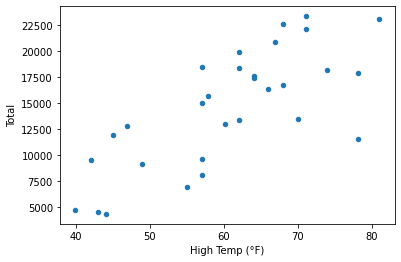

In [34]:
dataset_no_duplicates.plot(x="High Temp (°F)", y="Total", kind="scatter")

### split temperature to category according quantiles

In [38]:
def temp_cat(temp):

    quantiles = np.quantile(dataset_no_duplicates["High Temp (°F)"], np.linspace(0,1,4))
    if temp >= quantiles[0] and temp < quantiles[1]:
        return 0
    elif temp >= quantiles[1] and temp < quantiles[2]:    
        return 1
    else:
        return 2

In [39]:
dataset_no_duplicates["temp_category"] = dataset_no_duplicates["High Temp (°F)"].apply(lambda x: temp_cat(x))


In [42]:
dataset_no_duplicates["rainy"] = dataset_no_duplicates.Precipitation.apply(lambda prec: 0 if prec ==0 else 1)
dataset_no_duplicates["temp_avg_below"] = dataset_no_duplicates["temp_category"].apply(lambda x: 1 if x == 0 else 0)
dataset_no_duplicates["temp_avg"] = dataset_no_duplicates["temp_category"].apply(lambda x: 1 if x ==1 else 0)

In [43]:
final_dataset =dataset_no_duplicates[["Date", "temp_avg_below", "temp_avg", "rainy", "is_weekend", "Total"]].copy()

In [44]:
final_dataset.head()

,Date,temp_avg_below,temp_avg,rainy,is_weekend,Total
0,2016-04-01,0,0,1,0,11497
1,2016-04-02,1,0,1,1,6922
2,2016-04-03,1,0,1,1,4759
3,2016-04-04,1,0,1,0,4335
4,2016-04-05,1,0,0,0,9471


In [46]:
X = final_dataset[["temp_avg_below", "temp_avg", "rainy", "is_weekend"]]
y = final_dataset.Total

In [47]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=1)

In [48]:
lin = LinearRegression()
lin.fit(xtrain, ytrain)
lin.score(xtrain,ytrain)

0.7974414108896123

In [67]:
y_hat = lin.predict(xtest)
print(mean_squared_error(ytest, y_hat))
print(math.sqrt(mean_squared_error(ytest, y_hat)))
r2_score = lin.score(xtest,ytest)
print(r2_score*100,'%')

5183671.792307703
2276.767838912809
84.93680644753726 %


## logistic regression

In [64]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
y_pred = logreg.predict(xtest)
y_pred_proba = logreg.predict_proba(xtest)[:, 1]

In [68]:
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(ytest, y_pred))
print(accuracy_score(ytest, y_pred))

LogisticRegression accuracy is 0.000
0.0


# Recipes with Rating and Nutrition dataset with LR

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv("epi_r.csv")

In [71]:
df.shape

(20052, 680)

In [72]:
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
dataset = df[["title", "calories", "protein","fat", "sodium", "dessert"]]

In [74]:
dataset.isna().any()

title       False
calories     True
protein      True
fat          True
sodium       True
dessert     False
dtype: bool

In [76]:
dataset.nunique()

title       17736
calories     1858
protein       282
fat           326
sodium       2434
dessert         2
dtype: int64

In [77]:
dataset_no_duplicity = dataset.drop_duplicates()

In [78]:
dataset_no_duplicity.isnull().sum()

title          0
calories    3732
protein     3760
fat         3780
sodium      3733
dessert        0
dtype: int64

In [79]:
dataset_no_duplicity =dataset_no_duplicity.dropna()
dataset_no_duplicity.shape

(14403, 6)

In [80]:
dataset_no_duplicity.describe()

,calories,protein,fat,sodium,dessert
count,1.440300e+04,14403.000000,1.440300e+04,1.440300e+04,14403.000000
mean,6.666392e+03,92.641741,3.645512e+02,6.617940e+03,0.185239
std,3.760675e+05,3519.910073,2.139252e+04,3.496002e+05,0.388505
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,2.070000e+02,3.000000,8.000000e+00,9.100000e+01,0.000000
50%,3.480000e+02,9.000000,1.800000e+01,3.070000e+02,0.000000
75%,6.010000e+02,28.500000,3.400000e+01,7.365000e+02,0.000000
max,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000


In [81]:
dataset_no_duplicity.calories.quantile(0.95)

1326.699999999999

In [82]:
dataset_no_duplicity= dataset_no_duplicity[(dataset_no_duplicity["calories"] < dataset_no_duplicity.calories.quantile(0.95)) & (dataset_no_duplicity["calories"] >0)]

In [83]:
dataset_no_duplicity.calories.describe()

count    13677.000000
mean       403.768224
std        274.169306
min          1.000000
25%        201.000000
50%        329.000000
75%        551.000000
max       1324.000000
Name: calories, dtype: float64

In [84]:
def removeiqr(df1,df_column):
    Q1=df1[df_column].quantile(0.25)
    Q3=df1[df_column].quantile(0.75)
    IQR=Q3-Q1
    vysledek=df1[~((df1[df_column] < (Q1 - 1.5 * IQR)) |(df1[df_column] > (Q3 + 1.5 * IQR)))]
    return vysledek

In [86]:
datasetfinal = removeiqr(dataset_no_duplicity,"calories")
datasetfinal = removeiqr(datasetfinal,"sodium")

In [87]:
datasetfinal.describe()

,calories,protein,fat,sodium,dessert
count,12472.000000,12472.000000,12472.000000,12472.000000,12472.000000
mean,366.746312,14.080180,19.927117,361.180484,0.201732
std,231.569796,16.822182,17.087986,360.685694,0.401309
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,194.000000,3.000000,7.000000,70.000000,0.000000
50%,309.000000,7.000000,16.000000,239.000000,0.000000
75%,504.000000,20.000000,28.000000,550.000000,0.000000
max,1076.000000,155.000000,108.000000,1500.000000,1.000000


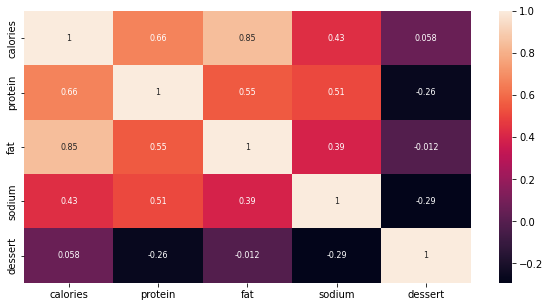

In [88]:
plt.figure(figsize=(10,5))
sns.heatmap(datasetfinal.corr(),annot = True, annot_kws={"size": 8})
plt.show()

In [90]:
datasetfinal.groupby("dessert").agg(["mean", "std"])

calories                protein                   fat             \
               mean         std       mean        std       mean        std   
dessert                                                                       
0.0      360.032543  233.549104  16.303636  18.074079  20.026416  17.420512   
1.0      393.313196  221.624362   5.281797   3.628099  19.534181  15.700351   

             sodium              
               mean         std  
dessert                          
0.0      414.089695  378.631744  
1.0      151.814785  150.649620

In [91]:
#  Normalization
df_norm_values = datasetfinal.copy()
cols_to_norm = ['calories','protein','fat', 'sodium']
df_norm_values[cols_to_norm] = df_norm_values[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [92]:
df_norm_values.head(3)

,title,calories,protein,fat,sodium,dessert
0,"Lentil, Apple, and Turkey Wrap",0.395349,0.193548,0.064815,0.372667,0.0
1,Boudin Blanc Terrine with Red Onion Confit,0.373953,0.116129,0.212963,0.959333,0.0
2,Potato and Fennel Soup Hodge,0.152558,0.038710,0.064815,0.110000,0.0


In [93]:
X = df_norm_values[['calories','protein','fat', 'sodium']]
y = df_norm_values.dessert

In [94]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=1)

In [97]:
LR = LogisticRegression()
LR.fit(xtrain, ytrain)

y_pred_lr = LR.predict(xtest)
log_train = round(LR.score(xtrain, ytrain) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, ytest) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")

Training Accuracy    : 82.71 %
Model Accuracy Score : 82.33 %


# Q_2 elastic net the same series 4 

### housing dataset //// predicting the house price

In [115]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [99]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)

print(dataframe.shape)
print(dataframe.head())

(506, 14)
        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [100]:
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

In [103]:
model = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [104]:
# evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [105]:
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [106]:
# scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 3.682 (0.530)


In [107]:
model.fit(X, y)

ElasticNet()

In [108]:
# new data fore prediction
new_data = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = model.predict([new_data])
print('Predicted: %.3f' % yhat)

Predicted: 31.047


In [110]:
# Choosing the right value of alpha and lr_ratio
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)


In [113]:
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(X, y)

In [114]:
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.378
Config: {'alpha': 0.01, 'l1_ratio': 0.97}


In [118]:
# ElasticNetCV  in sklearn
ratios = np.arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
model.fit(X, y)

print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11955.172792535832, tolerance: 3.7370255692307692
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to un

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6944.073250701154, tolerance: 3.9532313662280716
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12129.589419203325, tolerance: 3.8058872835164848
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4820.641174975419, tolerance: 3.766251745054944
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4944.850986194517, tolerance: 3.8184083516483502
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may l

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4955.416755393668, tolerance: 3.8868426644736838
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increas

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5245.085871826399, tolerance: 3.8665083516483523
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5102.0699411074675, tolerance: 3.9287605802197803
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5033.99988365508, tolerance: 3.7981172879120875
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5102.069941107475, tolerance: 3.9287605802197803
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increas

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4942.764618866218, tolerance: 3.834862791208791
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4938.326038547948, tolerance: 3.7370255692307692
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increas

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4820.641174975499, tolerance: 3.766251745054944
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5003.353967288109, tolerance: 3.7929101450549454
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may l

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5199.897867372689, tolerance: 4.005465749450551
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5042.312198197909, tolerance: 3.7652059648351646
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may l

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5167.833209657409, tolerance: 3.84503599122807
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase 

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4703.960334103904, tolerance: 3.701088938596491
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5083.671343099555, tolerance: 3.988871570175439
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4653.826260693626, tolerance: 3.587134936263736
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4758.911576524384, tolerance: 3.7834934373626385
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may l

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4955.416755393719, tolerance: 3.8868426644736838
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5152.650286426484, tolerance: 3.9961889451754384
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may 

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5245.085871826366, tolerance: 3.8665083516483523
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5102.069941107409, tolerance: 3.9287605802197803
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may 

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5246.0234022677905, tolerance: 3.9532313662280716
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5199.89786737258, tolerance: 4.005465749450551
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may l

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5211.336901122282, tolerance: 3.966417945175438
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5083.671343099515, tolerance: 3.988871570175439
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4758.911576524464, tolerance: 3.7834934373626385
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4942.764618866313, tolerance: 3.834862791208791
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may l

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5167.833209657358, tolerance: 3.84503599122807
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase 

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5122.302926490127, tolerance: 3.9541719649122817
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increas

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4877.199962414121, tolerance: 3.621472421052632
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4748.899934575249, tolerance: 3.9281246228070166
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increas

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5042.31219819788, tolerance: 3.7652059648351646
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unex

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4942.764618866284, tolerance: 3.834862791208791
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4955.416755393646, tolerance: 3.8868426644736838
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5152.650286426404, tolerance: 3.9961889451754384
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may 

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4938.326038547915, tolerance: 3.7370255692307692
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to une

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5125.721436586886, tolerance: 3.890334659340659
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5003.353967288371, tolerance: 3.7929101450549454
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increas

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5083.671343099515, tolerance: 3.988871570175439
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4748.899934575351, tolerance: 3.9281246228070166
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to une

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5033.99988365524, tolerance: 3.7981172879120875
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4703.960334103904, tolerance: 3.701088938596491
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4613.393614627377, tolerance: 3.7803832894736846
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may l

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5003.353967288225, tolerance: 3.7929101450549454
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increas

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5199.8978673726015, tolerance: 4.005465749450551
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increas

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5167.833209657365, tolerance: 3.84503599122807
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5033.999883655095, tolerance: 3.7981172879120875
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may le

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5211.33690112238, tolerance: 3.966417945175438
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4533.389265962091, tolerance: 3.742845230769231
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lea

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5125.721436586933, tolerance: 3.890334659340659
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5246.023402267718, tolerance: 3.9532313662280716
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increas

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5152.65028642636, tolerance: 3.9961889451754384
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5245.085871826312, tolerance: 3.8665083516483523
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4359.411693485803, tolerance: 3.8221698593406592
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may 

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4944.8509861944185, tolerance: 3.8184083516483502
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5042.312198197782, tolerance: 3.7652059648351646
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increas

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4938.32603854793, tolerance: 3.7370255692307692
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4359.411693485705, tolerance: 3.8221698593406592
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may l

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5199.897867372645, tolerance: 4.005465749450551
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unex

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4613.393614627377, tolerance: 3.7803832894736846
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to une

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5167.833209657412, tolerance: 3.84503599122807
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase 

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5199.897867372594, tolerance: 4.005465749450551
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4942.764618866226, tolerance: 3.834862791208791
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may le

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5049.832884705022, tolerance: 3.8058872835164848
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to une

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4824.1185801470565, tolerance: 3.8953458925438604
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5083.671343099581, tolerance: 3.988871570175439
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may 

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5211.3369011221985, tolerance: 3.966417945175438
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increas

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5308.605854251848, tolerance: 3.8821705054945053
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increas

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5042.312198197829, tolerance: 3.7652059648351646
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4942.76461886624, tolerance: 3.834862791208791
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may le

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4942.764618866298, tolerance: 3.834862791208791
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4653.826260693546, tolerance: 3.587134936263736
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may le

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5199.89786737266, tolerance: 4.005465749450551
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase 

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5246.02340226774, tolerance: 3.9532313662280716
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5049.832884705003, tolerance: 3.8058872835164848
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may l

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4942.764618866342, tolerance: 3.834862791208791
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4653.8262606936805, tolerance: 3.587134936263736
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to une

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4653.826260693557, tolerance: 3.587134936263736
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4758.911576524479, tolerance: 3.7834934373626385
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may l

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5109.406543411715, tolerance: 3.9622208219780224
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to une

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4653.826260693644, tolerance: 3.587134936263736
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unex

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5246.023402267761, tolerance: 3.9532313662280716
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increas

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5308.605854251971, tolerance: 3.8821705054945053
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increas

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4359.41169348573, tolerance: 3.8221698593406592
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5245.085871826239, tolerance: 3.8665083516483523
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may l

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5042.312198197858, tolerance: 3.7652059648351646
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increas

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5003.353967288163, tolerance: 3.7929101450549454
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increas

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5102.069941107351, tolerance: 3.9287605802197803
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5122.302926489996, tolerance: 3.9541719649122817
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may 

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5042.312198197844, tolerance: 3.7652059648351646
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increas

C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4944.850986194539, tolerance: 3.8184083516483502
  model = cd_fast.enet_coordinate_descent_gram(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increas

alpha: 0.000000
l1_ratio_: 0.110000


C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1771: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X, y)
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.539e+03, tolerance: 4.272e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
